# Social Web report
Adoption of Mastodon as a campaign platform by dutch political parties for the recent (2023) national HOR elections.
- What parties have an official account
  - National
  - Local (less important for national elections)
- What talking points are discussed on Mastodon 
  - Finding talking points on Mastodon
  - Stemwijzer talking points compared to official account talking points
  - Engaged user talking points
- Engaged user sentiment and connection to other politically afilliated accounts

In [2]:
import platform
import sys
import os
print("This jupyter notebook is running on Python " + platform.python_version())
assert sys.version_info >= (3, 10)

This jupyter notebook is running on Python 3.10.12


In [1]:
%pip install mastodon.py
%pip install python-dotenv
%pip install pandas
%pip install graphviz
%pip install pygraphviz



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 896.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached pygraphviz-1.11.zip (120 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit c

In [3]:
from mastodon import Mastodon
from dotenv import load_dotenv
load_dotenv()

Mastodon.create_app(
    's23-21',
    # this is determined by your chosen server, if you picked the general server, dont change this line
    api_base_url='https://mastodon.social',
    to_file='client_credentials.secret'
);

In [4]:
mastodon_username = os.environ.get("MASTODON_USERNAME")
mastodon_password = os.environ.get('MASTODON_PASSWORD')

API = Mastodon(client_id='client_credentials.secret',)
API.log_in(
    mastodon_username,  # no caps
    mastodon_password,
    to_file='user_credentials.secret'
);

In [5]:
parties = [
["VVD","Volkspartij voor Vrijheid en Democratie"],
["D66", "Democraten 66"],
["GLPvdA", "GL", "PvdA", "groenlinks", "GROENLINKS / Partij van de Arbeid", "GL/PvdA", "GroenLinks/PvdA"],
["PVV", "Partij voor de Vrijheid"],
["CDA", "Christen-Democratisch Appel"],
["SP", "Socialistische Partij"],
["FvD", "Forum voor Democratie"],
["PvdD", "Partij voor de Dieren"],
["CU", "ChristenUnie"],
["Volt"],
["JA21"],
["SGP", "Staatkundig Gereformeerde Partij"],
["DENK"],
["50PLUS"],
["BBB","Boeren Burger Beweging"],
["BIJ1"],
["Piratenpartij", "Piratenpartij – De Groenen", "De Groenen", "PP"],
["BVNL", "Belang van Nederland", "Groep Van Haga"],
["NSC", "Nieuw Sociaal Contract"],
["Splinter"],
["LP", "Libertaire Partij"],
["LEF", "Voor de Nieuwe Generatie"],
["SvN", "Samen voor Nederland"],
["PLAN", "Nederland met een PLAN"],
["PvdS","PartijvdSport"],
["PPvB", "Politieke Partij voor Basisinkomen"],
]

accounts = {}
for party in parties:
    accounts[party[0]] = {}
    for name in party:
        print(name)
        accounts[party[0]][name] = API.account_search(f'{name} "officiele" "official"')

In [9]:
API.search_v2(q = "Verkiezingen immigratie", resolve = True)

{'accounts': [],
 'statuses': [{'id': 111483696663052153,
   'created_at': datetime.datetime(2023, 11, 27, 17, 30, 9, tzinfo=tzutc()),
   'in_reply_to_id': None,
   'in_reply_to_account_id': None,
   'sensitive': False,
   'spoiler_text': '',
   'visibility': 'public',
   'language': 'nl',
   'uri': 'https://mastodon.nl/users/Blogfeedser/statuses/111483696532197724',
   'url': 'https://mastodon.nl/@Blogfeedser/111483696532197724',
   'replies_count': 0,
   'reblogs_count': 0,
   'favourites_count': 0,
   'edited_at': None,
   'favourited': False,
   'reblogged': False,
   'muted': False,
   'bookmarked': False,
   'content': '<p>\'De immigratie moet omlaag, vindt een grote meerderheid van Nederland. En dat vindt ook zeker de grote winnaar van de verkiezingen: Geert Wilders.\'</p><p><a href="https://mastodon.nl/tags/deVolkskrantElkeDag" class="mention hashtag" rel="nofollow noopener noreferrer" target="_blank">#<span>deVolkskrantElkeDag</span></a> Grip op migratie, kan dat eigenlijk wel

In [57]:
import json
import datetime

# Remove datetime objects from accounts dictionary
def remove_datetime(obj):
    if isinstance(obj, datetime.datetime):
        return None
    return obj

In [29]:
official_accounts = {
    "d66": {"bunnik": "D66Bunnik@mastodon.online"},
    "pvdd": {"national": "PartijvoordeDieren@mastodon.nl", "nijmegen": "PvdDNijmegen@mastodon.nl"},
    "piratenpartij":{"national": "Piratenpartij@mastodon.nl", "national": "Piratenpartij@social.globalpirates.net"},
    "bij1": {"national": "BIJ1@social.bij1.org", "utrecht": "UtrechtBIJ1@social.bij1.org"},
    "pvdagl": {"de ronde venen": "PvdAGLDRV@mastodon.nl", "overijssel":"pvdaoverijssel@mastodon.nl"},
    "fvd": {"*national": "fvdemocratie"},
    "volt": {"national": "voltnederland@mastodon.nl"}
}

mapped_accounts = {}

for party, branches in official_accounts.items():
    print(type(official_accounts))
    print(type(official_accounts[party]))
    for branch, account in branches.items():
        server = account.split("@")[1] if "@" in account else "mastodon.online"
        if server not in mapped_accounts:
            mapped_accounts[server] = {}
        if party not in mapped_accounts[server]:
            mapped_accounts[server][party] = {}
        mapped_accounts[server][party][branch] = account

mapped_accounts


<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


{'mastodon.online': {'d66': {'bunnik': 'D66Bunnik@mastodon.online'},
  'fvd': {'*national': 'fvdemocratie'}},
 'mastodon.nl': {'pvdd': {'national': 'PartijvoordeDieren@mastodon.nl',
   'nijmegen': 'PvdDNijmegen@mastodon.nl'},
  'pvdagl': {'de ronde venen': 'PvdAGLDRV@mastodon.nl',
   'overijssel': 'pvdaoverijssel@mastodon.nl'},
  'volt': {'national': 'voltnederland@mastodon.nl'}},
 'social.globalpirates.net': {'piratenpartij': {'national': 'Piratenpartij@social.globalpirates.net'}},
 'social.bij1.org': {'bij1': {'national': 'BIJ1@social.bij1.org',
   'utrecht': 'UtrechtBIJ1@social.bij1.org'}}}

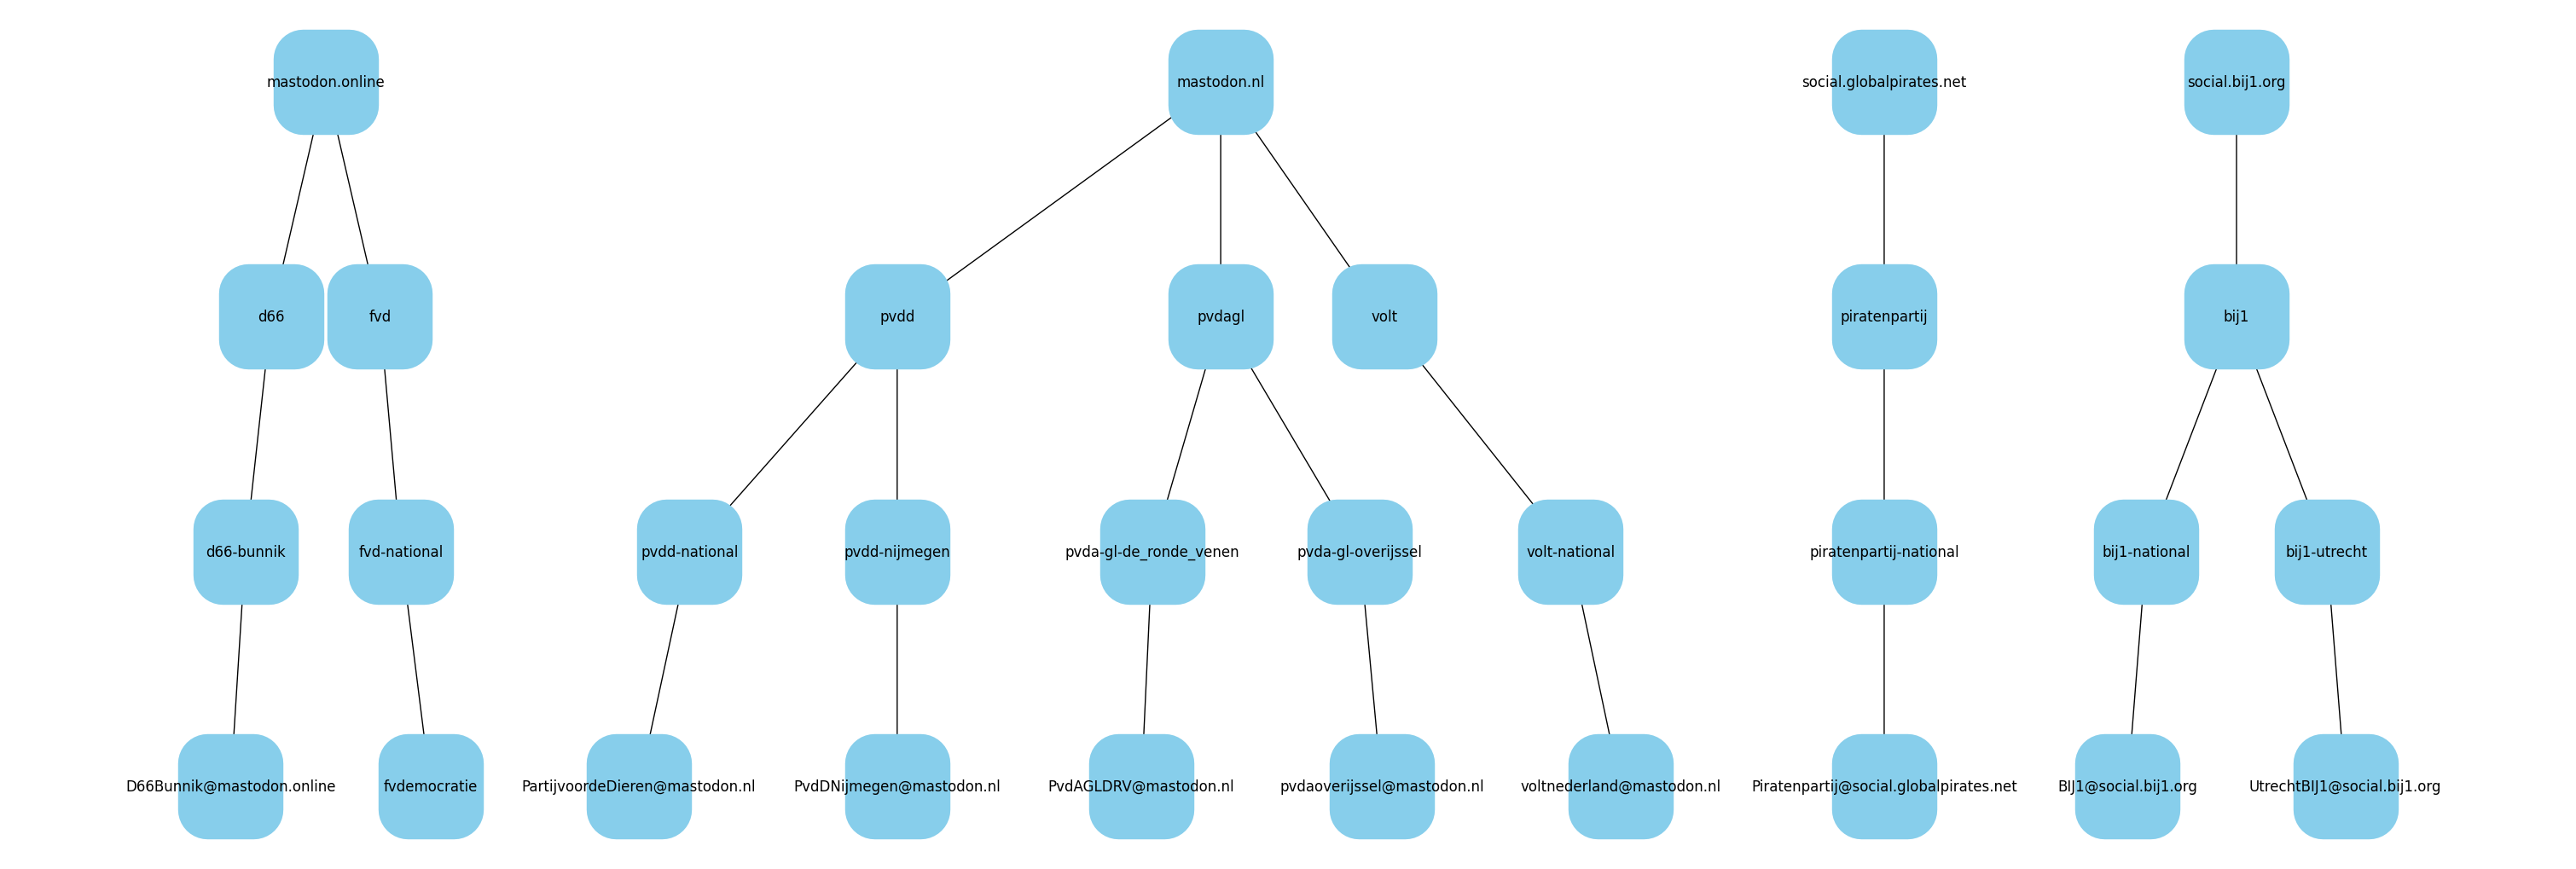

In [26]:
mapped_accounts = {'mastodon.online': {'d66': {'d66-bunnik': 'D66Bunnik@mastodon.online'},
                                       'fvd': {'fvd-national': 'fvdemocratie'}},
                   'mastodon.nl': {'pvdd': {'pvdd-national': 'PartijvoordeDieren@mastodon.nl',
                                            'pvdd-nijmegen': 'PvdDNijmegen@mastodon.nl'},
                                   'pvdagl': {'pvda-gl-de_ronde_venen': 'PvdAGLDRV@mastodon.nl',
                                              'pvda-gl-overijssel': 'pvdaoverijssel@mastodon.nl'},
                                   'volt': {'volt-national': 'voltnederland@mastodon.nl'}},
                   'social.globalpirates.net': {'piratenpartij': {'piratenpartij-national': 'Piratenpartij@social.globalpirates.net'}},
                   'social.bij1.org': {'bij1': {'bij1-national': 'BIJ1@social.bij1.org',
                                                'bij1-utrecht': 'UtrechtBIJ1@social.bij1.org'}}}

official_accounts = {
    "d66": {"d66-bunnik": "D66Bunnik@mastodon.online"},
    "pvdd": {"pvdd-national": "PartijvoordeDieren@mastodon.nl", "pvdd-nijmegen": "PvdDNijmegen@mastodon.nl"},
    "piratenpartij": {"piratenpartij-national": "Piratenpartij@mastodon.nl", "piratenpartij-national": "Piratenpartij@social.globalpirates.net"},
    "bij1": {"bij1-national": "BIJ1@social.bij1.org", "bij1-utrecht": "UtrechtBIJ1@social.bij1.org"},
    "pvdagl": {"pvda-gl-de_ronde_venen": "PvdAGLDRV@mastodon.nl", "pvdda-gl-overijssel": "pvdaoverijssel@mastodon.nl"},
    "fvd": {"fvd-national": "fvdemocratie"},
    "volt": {"volt-national": "voltnederland@mastodon.nl"}
}


# Create a new directed graph
G = nx.DiGraph()

# Add nodes and edges for mapped_accounts
for server, parties in mapped_accounts.items():
    for party, regions in parties.items():
        for region, account in regions.items():
            G.add_edge(server, party)
            G.add_edge(party, region)
            G.add_edge(region, account)

# Add nodes and edges for official_accounts


# Draw the graph
plt.figure(figsize=(30, 10))
pos = graphviz_layout(
    G, prog='dot', args='-Goverlap=false -Gsplines=true -Gnodesep=1')
nx.draw(G, pos, with_labels=True, node_size=1500,
        node_color="skyblue", node_shape="s", alpha=1, linewidths=50)
plt.show()

# G = nx.DiGraph()

# for party, regions in official_accounts.items():
#     for region, account in regions.items():
#         G.add_edge(party, region)
#         G.add_edge(region, account)

# plt.figure(figsize=(30, 10))
# pos = graphviz_layout(
#     G, prog='dot', args='-Goverlap=false -Gsplines=true -Gnodesep=1')
# nx.draw(G, pos, with_labels=True, node_size=1500,
#         node_color="hotpink", node_shape="s", alpha=1, linewidths=50)
# plt.show()

# def draw_trees(tree):
#     G = nx.from_dict_of_dicts(tree)
#     plt.figure(figsize=(20,20))
#     nx.draw(G, with_labels=True, font_size=20, node_size=5000, font_weight='bold')

# draw_trees(mapped_accounts)
# # draw_trees(official_accounts)

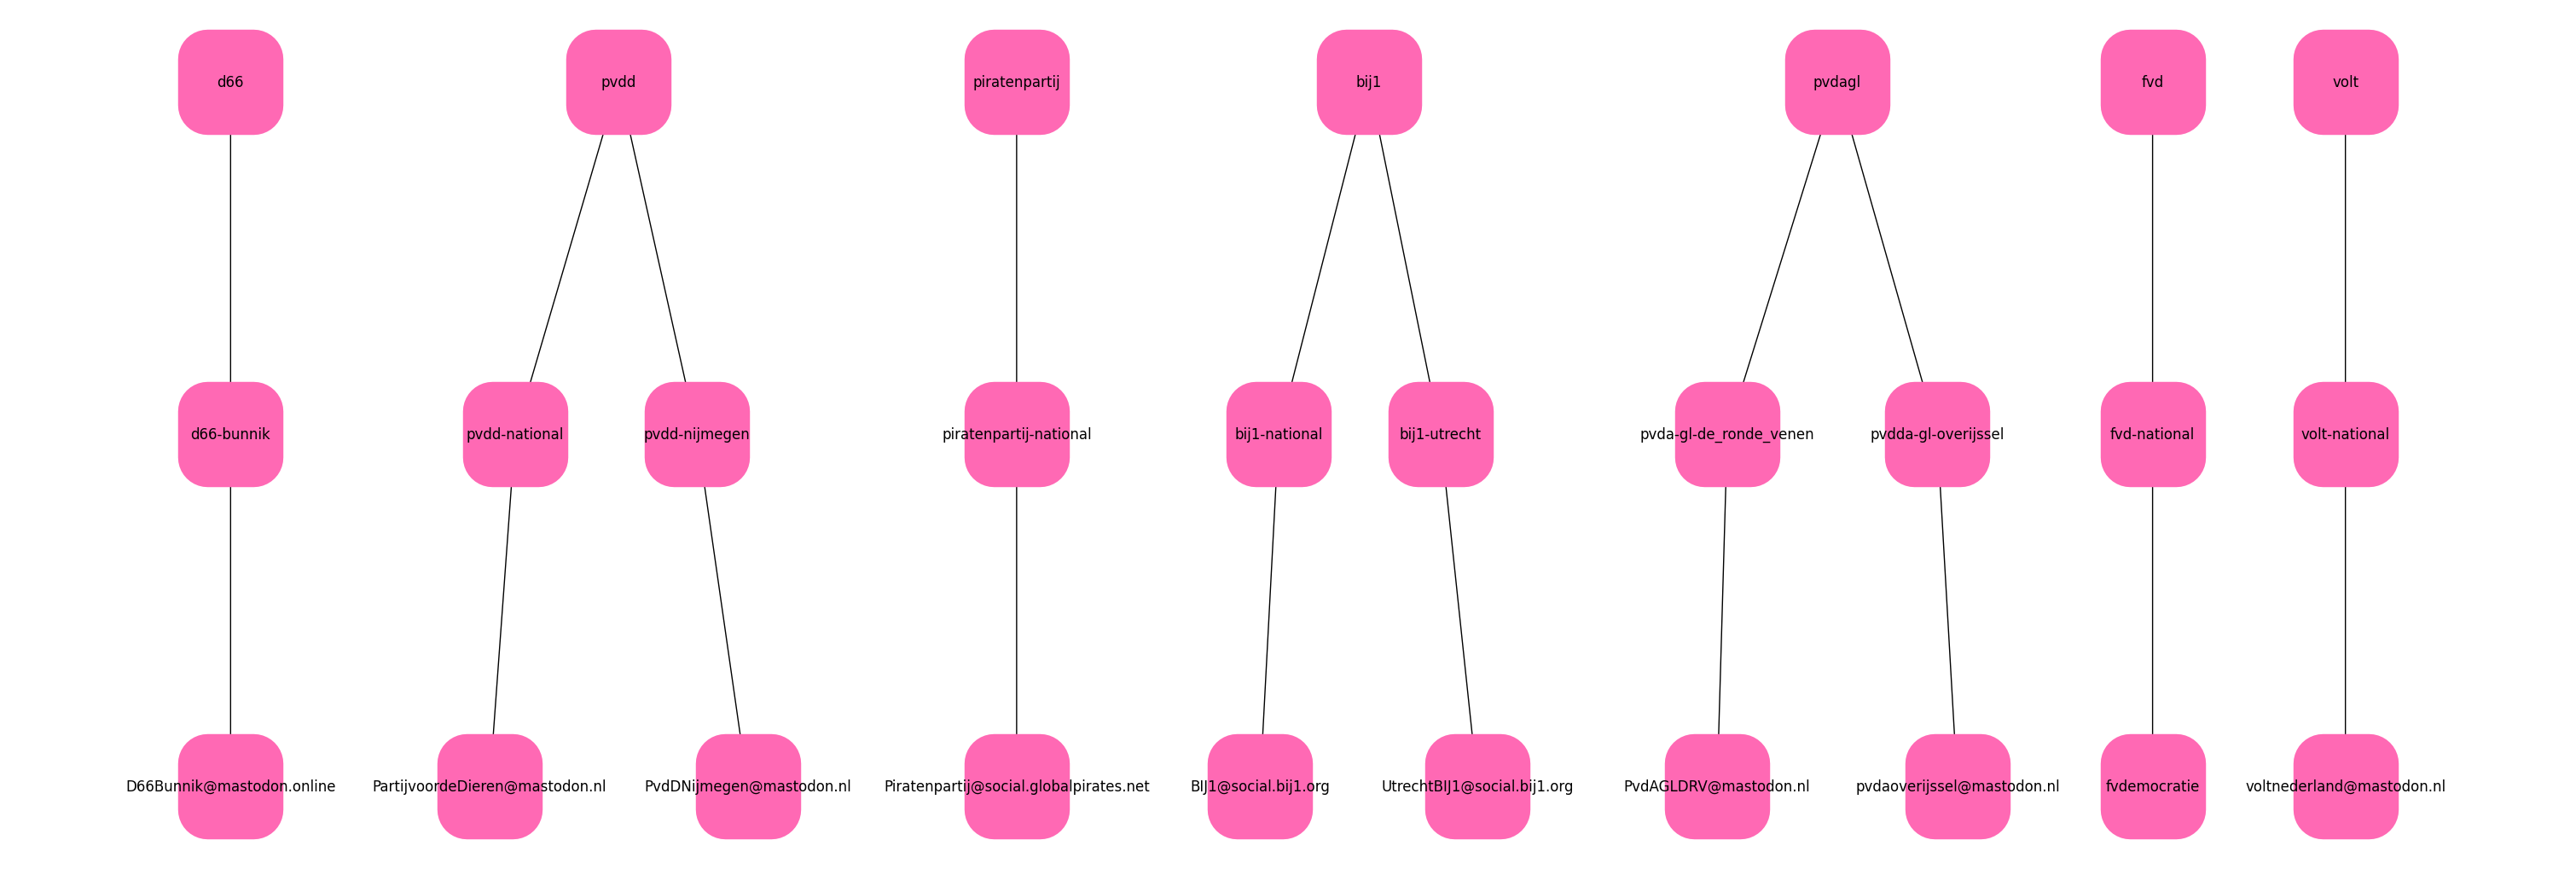

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_nested_dict(dictionary, k=.5):
    G = nx.Graph()

    def add_nodes_edges(dictionary, parent_node=None, level=0):
        for key, value in dictionary.items():
            node = f"{parent_node}.{key}" if parent_node else key
            G.add_node(node, level=level)  # Add level as an attribute to the node
            if parent_node:
                G.add_edge(parent_node, node)
            if isinstance(value, dict):
                add_nodes_edges(value, parent_node=node, level=level+1)

    add_nodes_edges(dictionary)
    pos = nx.spring_layout(G, k=k)

    # Get the highest level
    highest_level = min(nx.get_node_attributes(G, 'level').values())

    # Assign different node colors based on the level
    node_colors = ['lightblue' if G.nodes[node]['level'] != highest_level else 'orange' for node in G.nodes]

    nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, font_size=8, font_weight='bold', edge_color='gray')
    plt.show()

def visualize_dictionary_per_key(dictionary):
    for k, v in dictionary.items():
        new_dict = {}
        new_dict[k] = v
        visualize_nested_dict(new_dict)

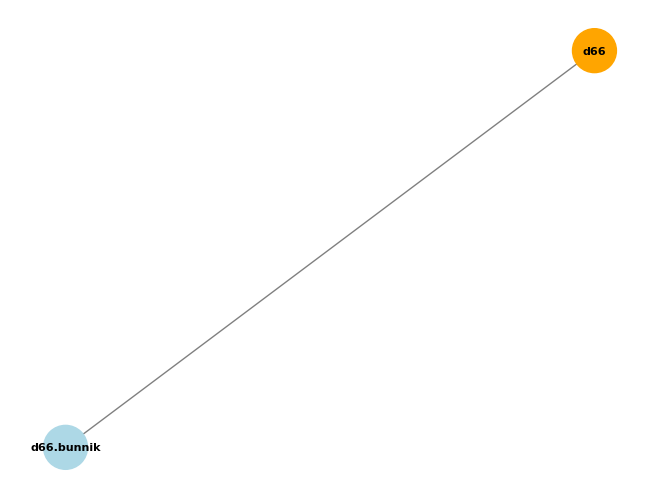

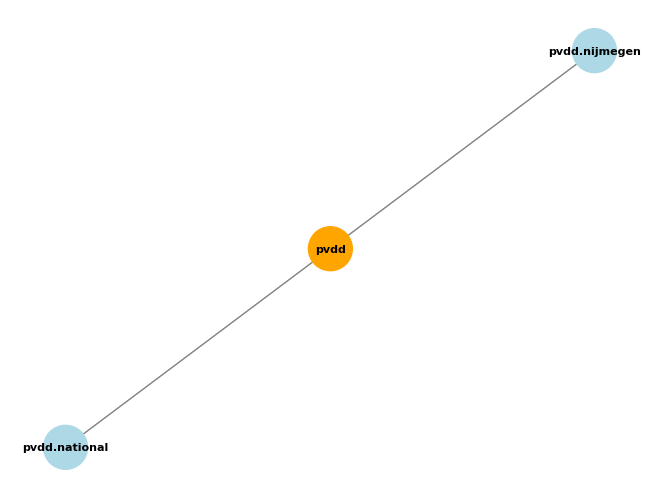

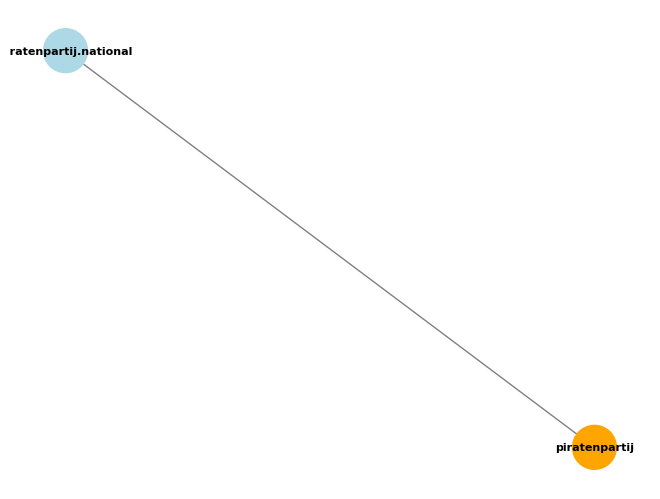

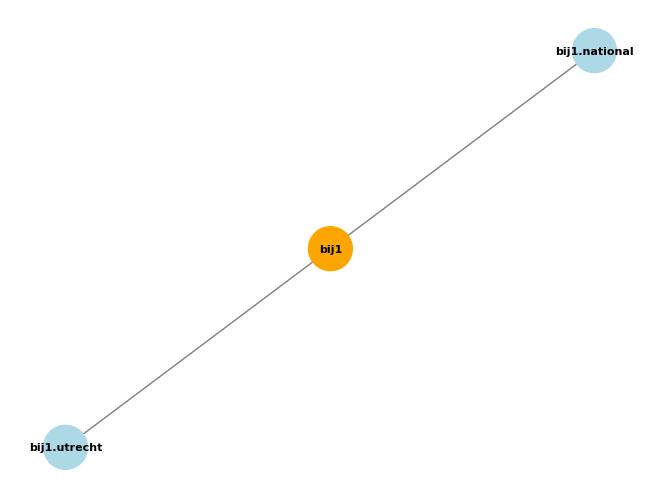

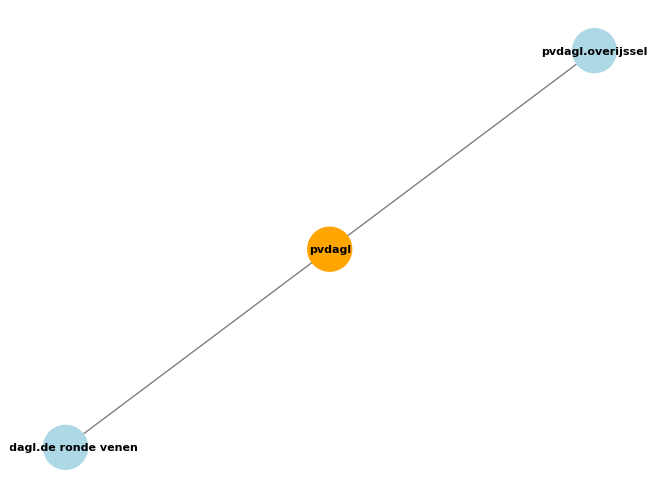

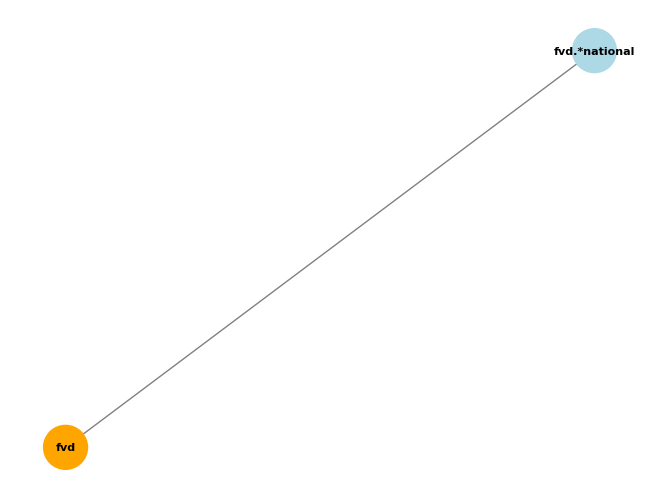

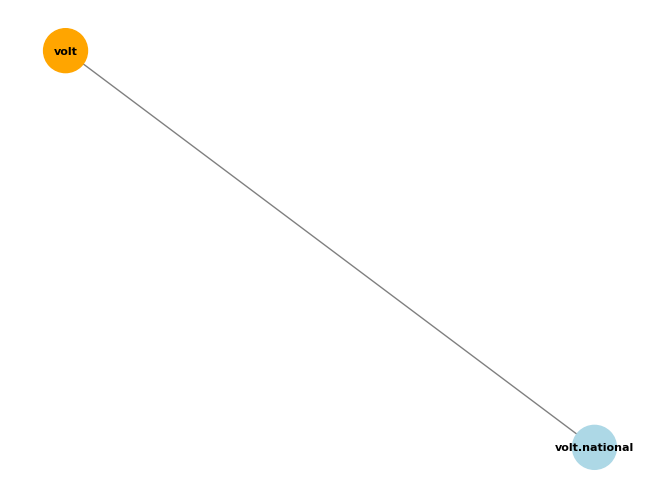

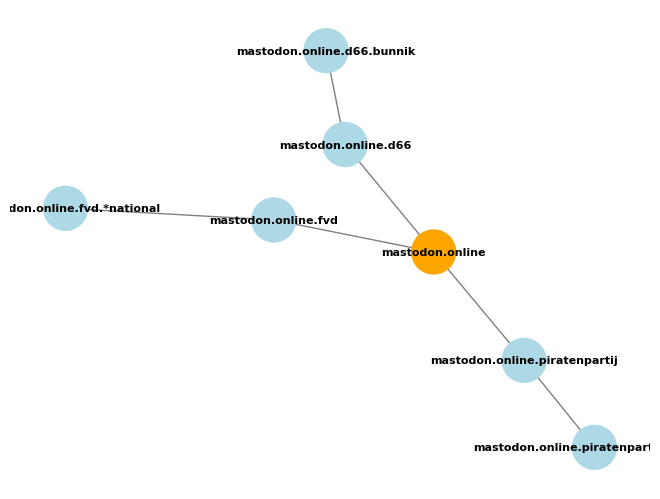

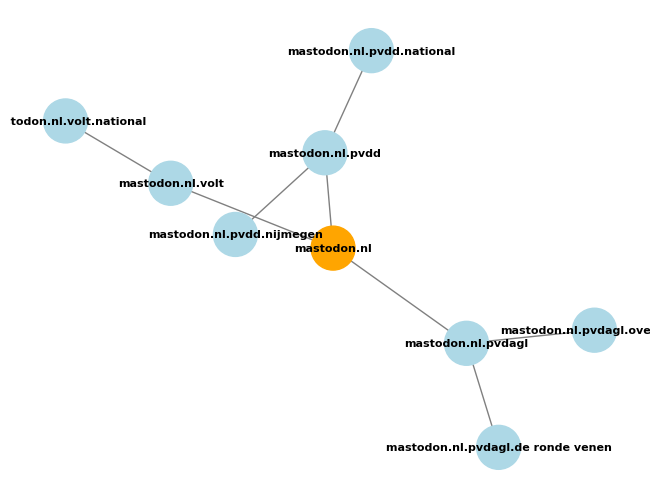

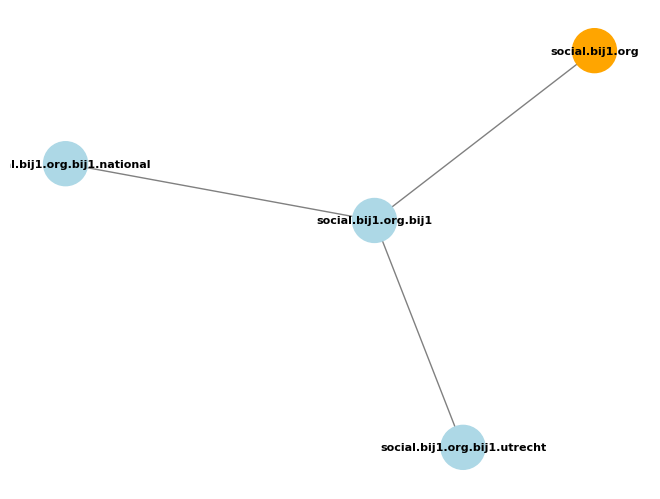

In [60]:
visualize_dictionary_per_key(official_accounts)
visualize_dictionary_per_key(mapped_accounts)

In [29]:
import pandas as pd
from datetime import datetime


def get_hashtag_activity(hashtag, until_date):
    # Create an empty dataframe to store the posts per day
    initial = API.timeline_hashtag(hashtag)
    initial['created_at'].replace(tzinfo=None)
    posts = pd.DataFrame(data=initial)
    until_date = datetime.strptime(until_date, '%Y-%m-%d')

    # Recursive function to fetch posts per day

    def fetch_posts_per_day(hashtag, until_date, max_id=None):
        # Fetch posts for the current iteration
        next_posts = API.timeline_hashtag(hashtag, max_id=max_id)

        last_post = next_posts[len(next_posts) - 1]

        # Append the posts per day to the dataframe
        nonlocal posts
        posts = pd.concat([posts, pd.DataFrame(data=next_posts)])
        last_post['created_at'].replace(tzinfo=None)
        # Check if there are more iterations required
        if (until_date <= last_post['created_at']):
            # Get the max_id of the last post in the current iteration
            max_id = last_post['id']

            # Recursive call to fetch posts for the next iteration
            fetch_posts_per_day(hashtag, until_date, max_id)

    # Call the recursive function to fetch posts per day
    fetch_posts_per_day(hashtag, until_date)

    return posts

In [36]:
hashtag='verkiezingen'
# Call the get_hashtag_activity function to get the posts per day
posts_per_day = get_hashtag_activity(
    hashtag, '2019-01-01')

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

def make_hashtag_plot(posts, hashtag):
    posts_by_created_at = posts.groupby(
        'created_at').size().reset_index(name='count')
    # Set the figure size
    plt.figure(figsize=(12, 6))

    # # Plot the posts per day using seaborn
    sns.lineplot(data=posts_by_created_at, x='created_at', y='count')

    # # Set the x-axis label
    plt.xlabel('Date')

    # # Set the y-axis label
    # plt.ylabel('Count')

    # # Set the title of the plot
    plt.title(f'#{hashtag} Activity Over Time')

    # # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # # Show the plot
    plt.show()
# posts_per_day

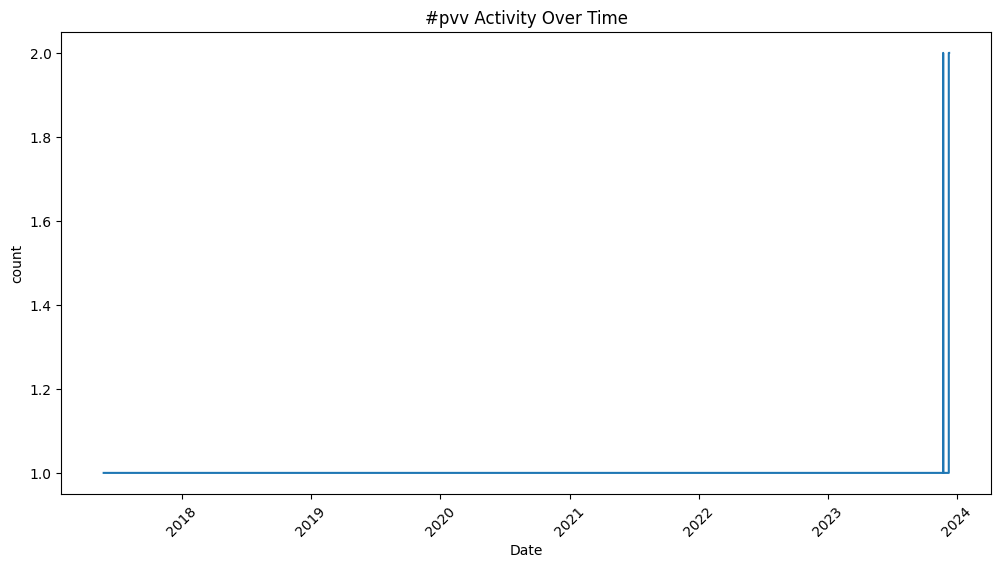

In [39]:
pvv = get_hashtag_activity('pvv', '2019-01-01')
make_hashtag_plot(pvv, 'pvv')